# Computing tilt angle of active region
(using python `class`!) This is generally more compact and efficient when it comes to building pipelines for larger datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tilted import tilt_computer

from astropy.io import fits
import glob
import os

In [2]:
main_dir = 'C:/Users/priya/Work/Projects/zzmisc/AR tilt calculation/'

In [3]:
HARP_folders = glob.glob(os.path.join(main_dir, 'data/*'))
HARPNUMs = []

for ii in HARP_folders:
    HARPNUMs.append(ii[-5 : ])

HARPNUMs

['13171',
 '13561',
 '13641',
 '13773',
 '13777',
 '13845',
 '13866',
 '13876',
 '14003']

### loading fits files and extracting fits content

In [4]:
magnetogram_content = []

for jj in range(len(HARPNUMs)):
    print(HARPNUMs[jj])
    magnetogram_content.append( fits.open(glob.glob(os.path.join(HARP_folders[jj], '*magnetogram.fits'))[0])[1] )

for ii in magnetogram_content:
    ii.data = np.flipud(ii.data)

13171
13561
13641
13773
13777
13845
13866
13876
14003


In [5]:
%%time

dataframes = []

for ii in range(len(magnetogram_content)):
    print(ii)
    
    SC = 25   # in case of larger dataset this will change, but for our case we have only ARs which are from solar cycle 25
    pipe = tilt_computer(magnetogram_content[ii], threshold = 400, SC = SC)
    
    a, b, c, d = pipe.contouring_strongfieldregions()
    x_fw, y_fw = pipe.fluxweighted_center()
    df_ii = pipe.computeTilt()
    
    display(df_ii)
    
    dataframes.append(df_ii)

df_Tilt = pd.concat(dataframes).reset_index(drop = True)
df_Tilt

0


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,13171,14079,25,N,438.603564,242.468963,612.554804,343.592893,364423.464139,True,True,-30.170932,149.829068


1


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,13561,14159,25,S,86.358928,95.921282,165.095642,79.989284,364423.464199,False,True,11.439077,-168.560923


2


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,13641,14182,25,N,119.661341,160.407226,411.136104,148.348476,364423.454496,True,False,2.369062,-177.630938


3


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,13773,14220,25,S,388.586536,167.175009,267.932937,127.35804,364423.432092,True,False,161.736561,161.736561


4


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,13777,14221,25,N,146.358462,111.094666,331.570634,152.214918,364423.474616,True,True,-12.517602,167.482398


5


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,13845,14237,25,N,175.459082,76.863844,89.664402,95.040859,364423.427584,False,False,-168.037836,-168.037836


6


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,13866,14243,25,N,150.359952,119.249493,330.124879,79.394889,364423.407419,True,False,12.50051,-167.49949


7


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,13876,14247,25,S,336.569601,102.905766,198.221455,108.417332,364423.407419,True,True,-177.718635,-177.718635


8


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,14003,14275,25,N,399.112659,409.974993,513.094565,226.100107,364423.39414,True,False,58.205707,-121.794293


CPU times: total: 1min 11s
Wall time: 1min 12s


,HARPNUM,NOAA_AR,Solar Cycle,Hemisphere,x_fw_neg [px],y_fw_neg [px],x_fw_pos [px],y_fw_pos [px],dpix [m],HALEness,JOYness,Absolute Tilt,Relative Tilt
0,13171,14079,25,N,438.603564,242.468963,612.554804,343.592893,364423.464139,True,True,-30.170932,149.829068
1,13561,14159,25,S,86.358928,95.921282,165.095642,79.989284,364423.464199,False,True,11.439077,-168.560923
2,13641,14182,25,N,119.661341,160.407226,411.136104,148.348476,364423.454496,True,False,2.369062,-177.630938
3,13773,14220,25,S,388.586536,167.175009,267.932937,127.358040,364423.432092,True,False,161.736561,161.736561
4,13777,14221,25,N,146.358462,111.094666,331.570634,152.214918,364423.474616,True,True,-12.517602,167.482398
5,13845,14237,25,N,175.459082,76.863844,89.664402,95.040859,364423.427584,False,False,-168.037836,-168.037836
6,13866,14243,25,N,150.359952,119.249493,330.124879,79.394889,364423.407419,True,False,12.500510,-167.499490
7,13876,14247,25,S,336.569601,102.905766,198.221455,108.417332,364423.407419,True,True,-177.718635,-177.718635
8,14003,14275,25,N,399.112659,409.974993,513.094565,226.100107,364423.394140,True,False,58.205707,-121.794293


14221

B_max: 1875.00
B_min: -908.80

Hemishpere: N
HALEness: True
JOYness:  True


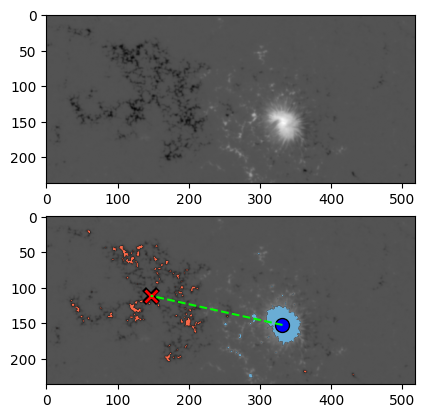

CPU times: total: 1.42 s
Wall time: 1.44 s


In [6]:
%%time

ii = 4

pipe = tilt_computer(magnetogram_content[ii], threshold = 400, SC = SC)

print(magnetogram_content[ii].header['NOAA_AR'])

print(f"\nB_max: {magnetogram_content[ii].data.max() :0.2f}")
print(f"B_min: {magnetogram_content[ii].data.min() :0.2f}")

a, b, c, d = pipe.contouring_strongfieldregions()
x_fw, y_fw = pipe.fluxweighted_center()
df_ii = pipe.computeTilt()

print(f"\nHemishpere: {df_ii['Hemisphere'].iloc[0]}")
print(f"HALEness: {df_ii['HALEness'].iloc[0]}")
print(f"JOYness:  {df_ii['JOYness'].iloc[0]}")

#
plt.subplot(2, 1, 1)

plt.imshow(magnetogram_content[ii].data, cmap = 'gray')

#
plt.subplot(2, 1, 2)

plt.imshow(magnetogram_content[ii].data, cmap = 'gray')
plt.imshow(b, cmap = 'Reds', vmin = 0.8, vmax = 1.2)
plt.imshow(d, cmap = 'Blues', vmin = 0.8, vmax = 1.2)

plt.plot(x_fw[0], y_fw[0], 'o', color = 'k', ms = 10)
plt.plot(x_fw[0], y_fw[0], 'o', color = 'b', ms = 8)

plt.plot(x_fw[1], y_fw[1], marker = 'x', mec = 'k', mfc = 'r', ms = 10, mew = 4)
plt.plot(x_fw[1], y_fw[1], marker = 'x', mec = 'r', mfc = 'r', ms = 9, mew = 2)

plt.plot(x_fw, y_fw, ls = '--', color = 'lime')

plt.show()